In [ ]:
import pandas as pd

In [ ]:
pip install metrics

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving diabetes.csv to diabetes (1).csv


In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploaded["diabetes.csv"]))

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
feature_cols=['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [ ]:
x=df[feature_cols]
y=df.Outcome

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 

In [ ]:
print(x_train)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
663            9      145             80  ...  37.9                     0.637   40
712           10      129             62  ...  41.2                     0.441   38
161            7      102             74  ...  37.2                     0.204   45
509            8      120             78  ...  25.0                     0.409   64
305            2      120             76  ...  39.7                     0.215   29
..           ...      ...            ...  ...   ...                       ...  ...
645            2      157             74  ...  39.4                     0.134   30
715            7      187             50  ...  33.9                     0.826   34
72            13      126             90  ...  43.4                     0.583   42
235            4      171             72  ...  43.6                     0.479   26
37             9      102             76  ...  32.9                     0.665   46

[61

In [ ]:
print(x_test)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
285            7      136             74  ...  26.0                     0.647   51
101            1      151             60  ...  26.1                     0.179   22
581            6      109             60  ...  25.0                     0.206   27
352            3       61             82  ...  34.4                     0.243   46
726            1      116             78  ...  36.1                     0.496   25
..           ...      ...            ...  ...   ...                       ...  ...
563            6       99             60  ...  26.9                     0.497   32
318            3      115             66  ...  38.1                     0.150   28
154            8      188             78  ...  47.9                     0.137   43
684            5      136             82  ...   0.0                     0.640   69
643            4       90              0  ...  28.0                     0.610   31

[15

In [ ]:
clf=DecisionTreeClassifier()    #object for classifier

In [ ]:
clf=clf.fit(x_train,y_train)

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
print("Accuracy:" ,metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7272727272727273


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


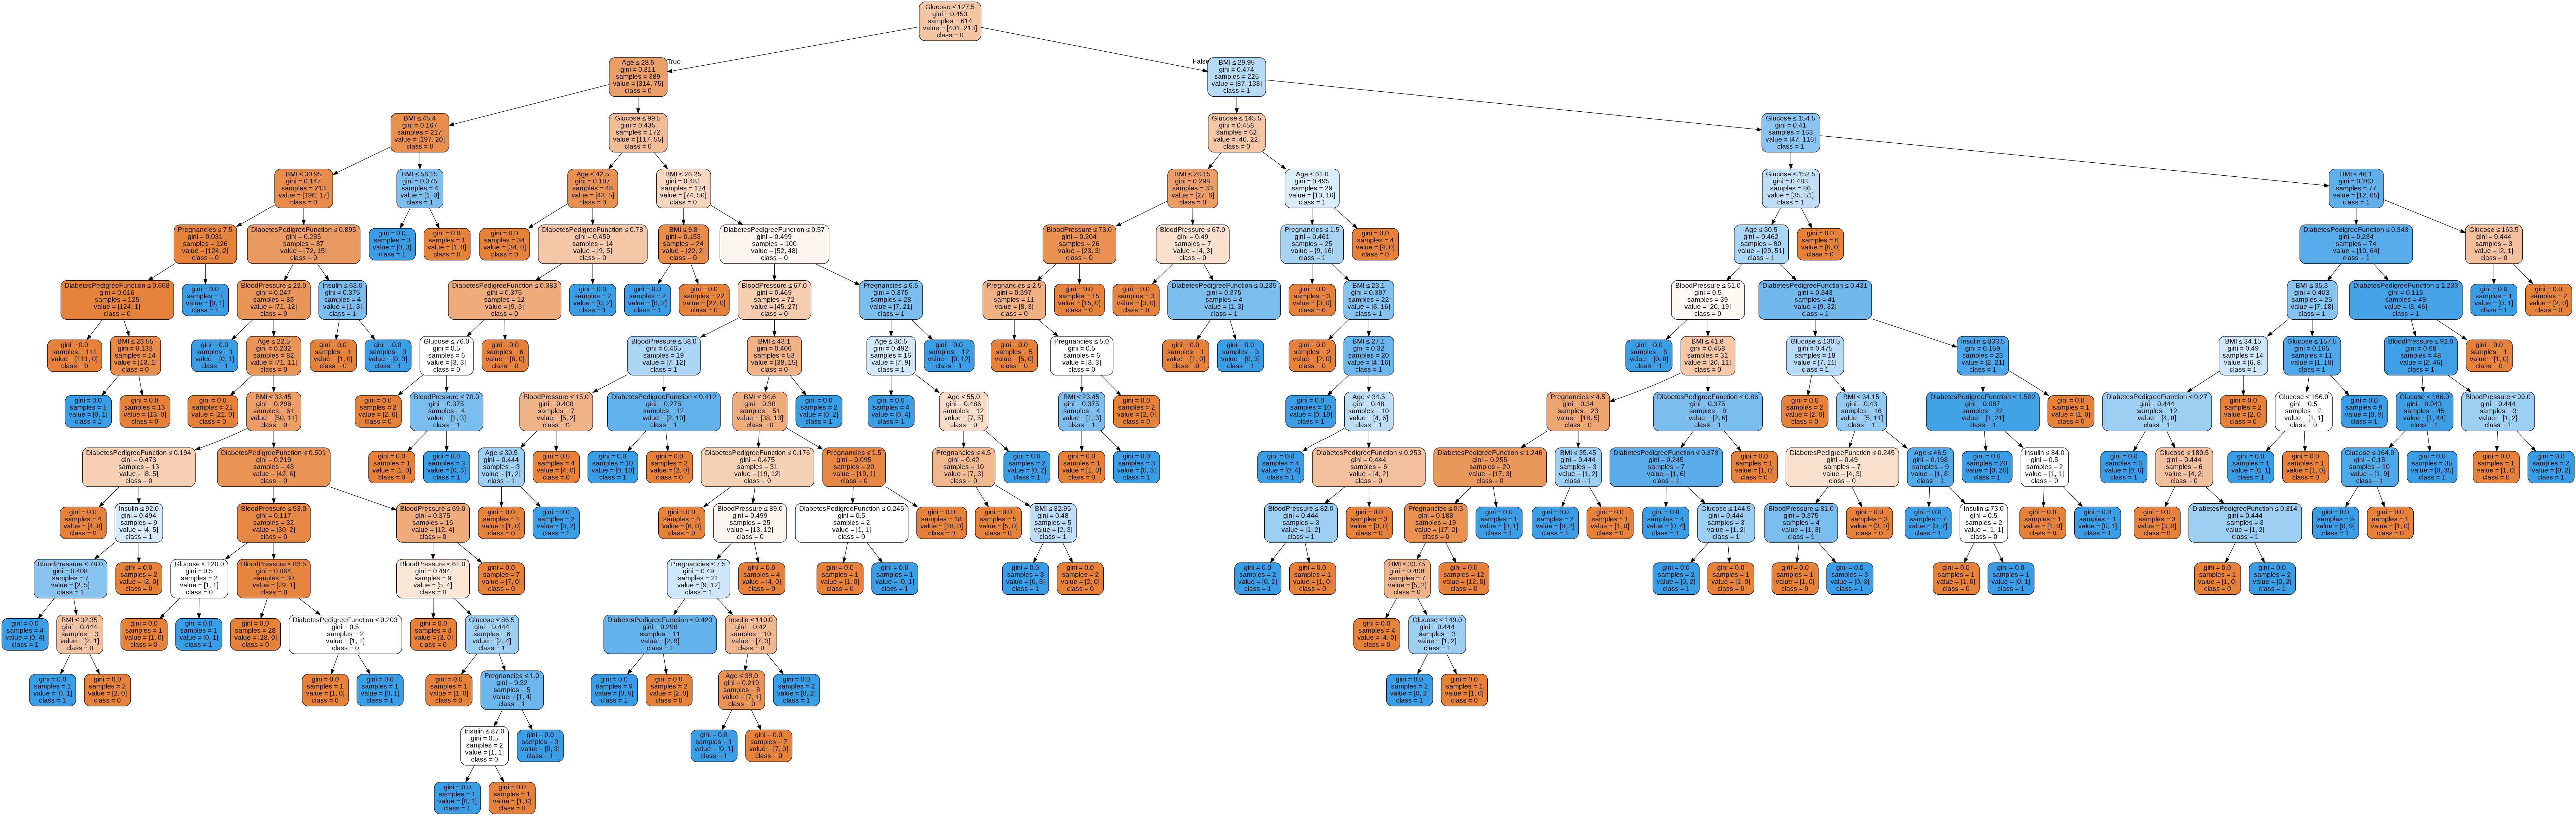

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())